<a href="https://colab.research.google.com/github/ekanshi258/optimization-algos/blob/master/clustered_design_3_ga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymoo

This experiment is based on the following paper:  
_Solving structural engineering design optimization problems using an artificial bee colony algorithm_: https://www.aimsciences.org/article/doi/10.3934/jimo.2014.10.777

I will be using Genetic Algo to solve the same problem as given in the paper.

In [2]:
import numpy as np
from pymoo.model.problem import FunctionalProblem
from pymoo.algorithms.so_genetic_algorithm import GA

from pymoo.factory import get_sampling, get_crossover, get_mutation, get_termination
from pymoo.optimize import minimize
from sklearn.datasets import make_blobs

Problem 3:  
**Tension/Compression String Design. (Section 4.2.3).**


---


Objective functions:  
```
Minimize f(X) = (x3 + 2) * x2 * x1^2
Such that:
g1(X) = 1 − (x2^3 * x3)/(71785 * x1^4) <= 0
g2(X) = (4*x2^2 − x1*x2)/12566*(x2*x1^3 − x1^4) + 1/(5108 * x1^2) − 1 <= 0
g3(X) = 1 − (140.45 * x1)/(x2^2 * x3) <= 0
g4(X) = (x1 + x2)/(1.5) − 1 <= 0

Bounds:
0.05 <= x1 <= 2 ; 0.25 <= x2 <= 1.3 ; 2 <= x3 <= 15
```

> Minimizing the weight of a tension/compression spring subject to constraints on minimum deflection, shear stress, surge frequency, limits on outside diameter and on design
variables. The design variables are the mean coil diameter(x1), the wire diameter (x2) and the number of active coil (x3).

In [3]:
#objective functions
objs = [
    lambda x: (x[2] + 2) * x[1] * x[0]**2,
]

# Contraint equations
constr_ieq = [
    lambda x: 1 - (x[1]**3 * x[2])/(71785 * x[0]**4),
    lambda x: (4*x[1]**2 - x[0]*x[1])/(12566*(x[1] * x[0]**3 - x[0]**4)) + 1/(5108 * x[0]**2) - 1,
    lambda x: 1 - (140.45 * x[0])/(x[1]**2 * x[2]),
    lambda x: (x[0] + x[1])/(1.5) - 1
]

# value bounds
lower_bound = np.array([0.05, 0.25, 2])
upper_bound = np.array([2, 1.3, 15])

# initialising problem
problem = FunctionalProblem(3, objs, constr_ieq=constr_ieq, xl=lower_bound, xu=upper_bound)


Instead of starting out with a randomly generated population as we usually do, I will be generating clusters of populations, i.e. the population will be clustered into groups instead of being scattered throughout the solution space.

**Reason**: Comparison of algo/solution quality with that when population is randomly scattered.

In [4]:
X, y = make_blobs(n_samples=300, centers=30, n_features=3, random_state=0)

In [ ]:
algorithm = GA(
    pop_size=1000,
    sampling = X,
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True)

termination = get_termination("n_gen", 280)

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

`<output hidden due to length>`

Results:

In [6]:
print("X: ", res.X)
print("Obj: ", res.F)
print("Constraints: ", res.G)
print("Execution time: ", res.exec_time)

X:  [ 0.05047845  0.32828536 13.17359145]
Obj:  [0.01269264]
Constraints:  [0. 0. 0. 0.]
Execution time:  41.97625660896301


Covergence:



```
x-axis: number of function evaluations
y-axis: optimum objective value
```


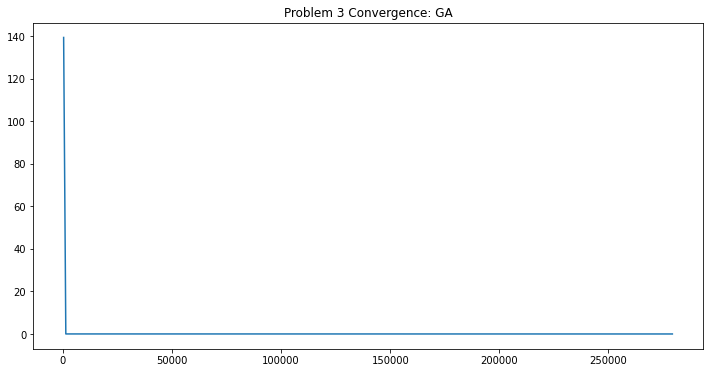

In [10]:
import matplotlib.pyplot as plt

n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history])
plt.figure(figsize=(12,6))
plt.title("Problem 3 Convergence: GA")
plt.plot(n_evals, opt, "-")
plt.show()

Convergence with logarithmic scale Y-Axis

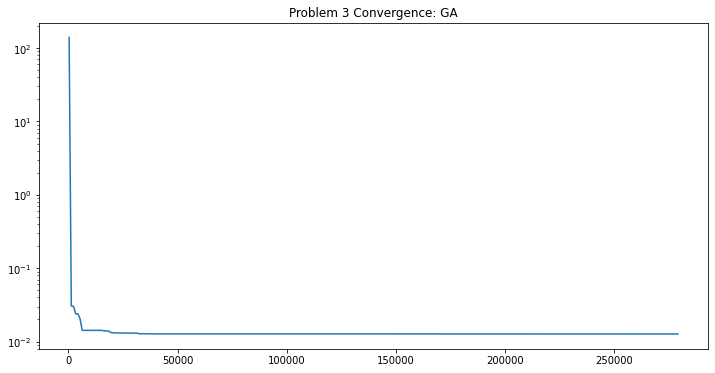

In [9]:
n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history])
plt.figure(figsize=(12,6))
plt.title("Problem 3 Convergence: GA")
plt.plot(n_evals, opt, "-")
plt.yscale("log")
plt.show()